# **Data loading and preprocessing**

**Mounting drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Importing libraries**

In [124]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import math
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

**Reading files**

In [32]:
all_data_raw = pd.read_csv('/content/drive/MyDrive/Main/Ml project/ml-prove-data/all-data-raw.csv', header = None)
test_data = pd.read_csv('/content/drive/MyDrive/Main/Ml project/ml-prove-data/test.csv', header = None)
train_data = pd.read_csv('/content/drive/MyDrive/Main/Ml project/ml-prove-data/train.csv', header = None)
validation_data = pd.read_csv('/content/drive/MyDrive/Main/Ml project/ml-prove-data/validation.csv', header = None)

**Giving column names**

In [33]:
train_data.columns = ['Stat_F1' ,'Stat_F2' ,'Stat_F3' ,'Stat_F4' ,'Stat_F5' ,'Stat_F6' ,'Stat_F7' ,'Stat_F8' ,'Stat_F9' ,'Stat_F10' ,
                      'Stat_F11' ,'Stat_F12' ,'Stat_F13' , 'Dynamic_F1' ,'Dynamic_F2' ,'Dynamic_F3' ,'Dynamic_F4' ,'Dynamic_F5' ,
                        'Dynamic_F6' ,'Dynamic_F7' ,'Dynamic_F8' ,'Dynamic_F9' ,'Dynamic_F10' ,'Dynamic_F11' ,'Dynamic_F12' ,'Dynamic_F13' ,
                        'Dynamic_F14' ,'Dynamic_F15' ,'Dynamic_F16' ,'Dynamic_F17' ,'Dynamic_F18' ,'Dynamic_F19' ,'Dynamic_F20' ,'Dynamic_F21' ,
                        'Dynamic_F22' ,'Dynamic_F23' ,'Dynamic_F24' ,'Dynamic_F25' ,'Dynamic_F26' ,'Dynamic_F27' ,'Dynamic_F28' ,'Dynamic_F29' ,
                        'Dynamic_F30' ,'Dynamic_F31' ,'Dynamic_F32' ,'Dynamic_F33' ,'Dynamic_F34' ,'Dynamic_F35' ,'Dynamic_F36' ,'Dynamic_F37' ,
                        'Dynamic_F38' ,'Heuristic1' ,'Heuristic2' ,'Heuristic3' ,'Heuristic4' ,'Heuristic5', 'Heuristic0' ]

In [34]:
test_Data = pd.DataFrame(data=test_data.values, columns=train_data.columns)
validation_data = pd.DataFrame(data=validation_data.values, columns=train_data.columns)

In [35]:
all_data_raw.columns = ['Stat_F1' ,'Stat_F2' ,'Stat_F3' ,'Stat_F4' ,'Stat_F5' ,'Stat_F6' ,'Stat_F7' ,'Stat_F8' ,'Stat_F9' ,'Stat_F10' ,
                        'Stat_F11' ,'Stat_F12' ,'Stat_F13' ,'Stat_F14' ,'Dynamic_F1' ,'Dynamic_F2' ,'Dynamic_F3' ,'Dynamic_F4' ,'Dynamic_F5' ,
                        'Dynamic_F6' ,'Dynamic_F7' ,'Dynamic_F8' ,'Dynamic_F9' ,'Dynamic_F10' ,'Dynamic_F11' ,'Dynamic_F12' ,'Dynamic_F13' ,
                        'Dynamic_F14' ,'Dynamic_F15' ,'Dynamic_F16' ,'Dynamic_F17' ,'Dynamic_F18' ,'Dynamic_F19' ,'Dynamic_F20' ,'Dynamic_F21' ,
                        'Dynamic_F22' ,'Dynamic_F23' ,'Dynamic_F24' ,'Dynamic_F25' ,'Dynamic_F26' ,'Dynamic_F27' ,'Dynamic_F28' ,'Dynamic_F29' ,
                        'Dynamic_F30' ,'Dynamic_F31' ,'Dynamic_F32' ,'Dynamic_F33' ,'Dynamic_F34' ,'Dynamic_F35' ,'Dynamic_F36' ,'Dynamic_F37' ,
                        'Dynamic_F38' ,'Dynamic_F39' ,'Heuristic1' ,'Heuristic2' ,'Heuristic3' ,'Heuristic4' ,'Heuristic5']


In [ ]:
all_data = train_data
all_data = all_data.append(validation_data)
all_data = all_data.append(test_Data)

# Exploratory Data Analysis

**Checking for missing values**

In [37]:
all_data.isna().sum()

Stat_F1        0
Stat_F2        0
Stat_F3        0
Stat_F4        0
Stat_F5        0
Stat_F6        0
Stat_F7        0
Stat_F8        0
Stat_F9        0
Stat_F10       0
Stat_F11       0
Stat_F12       0
Stat_F13       0
Dynamic_F1     0
Dynamic_F2     0
Dynamic_F3     0
Dynamic_F4     0
Dynamic_F5     0
Dynamic_F6     0
Dynamic_F7     0
Dynamic_F8     0
Dynamic_F9     0
Dynamic_F10    0
Dynamic_F11    0
Dynamic_F12    0
Dynamic_F13    0
Dynamic_F14    0
Dynamic_F15    0
Dynamic_F16    0
Dynamic_F17    0
Dynamic_F18    0
Dynamic_F19    0
Dynamic_F20    0
Dynamic_F21    0
Dynamic_F22    0
Dynamic_F23    0
Dynamic_F24    0
Dynamic_F25    0
Dynamic_F26    0
Dynamic_F27    0
Dynamic_F28    0
Dynamic_F29    0
Dynamic_F30    0
Dynamic_F31    0
Dynamic_F32    0
Dynamic_F33    0
Dynamic_F34    0
Dynamic_F35    0
Dynamic_F36    0
Dynamic_F37    0
Dynamic_F38    0
Heuristic1     0
Heuristic2     0
Heuristic3     0
Heuristic4     0
Heuristic5     0
Heuristic0     0
dtype: int64

In [38]:
all_data.head()

,Stat_F1,Stat_F2,Stat_F3,Stat_F4,Stat_F5,Stat_F6,Stat_F7,Stat_F8,Stat_F9,Stat_F10,...,Dynamic_F35,Dynamic_F36,Dynamic_F37,Dynamic_F38,Heuristic1,Heuristic2,Heuristic3,Heuristic4,Heuristic5,Heuristic0
0,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4630,0.27015,-1.5559,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1,1.4895,0.81688,2.1168,1.7895,1.5403,-0.31850,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4801,0.21361,-1.5559,1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4744,0.23245,-1.5559,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
3,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4401,0.34553,-1.5559,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,1.4895,0.81688,2.1168,1.7836,1.5346,-0.30543,-1.2477,-0.14537,-0.59356,-0.23316,...,-0.48278,1.4458,0.32669,-1.5559,-1.0,-1.0,-1.0,-1.0,-1.0,1.0


In [39]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6118 entries, 0 to 1529
Data columns (total 57 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Stat_F1      6118 non-null   float64
 1   Stat_F2      6118 non-null   float64
 2   Stat_F3      6118 non-null   float64
 3   Stat_F4      6118 non-null   float64
 4   Stat_F5      6118 non-null   float64
 5   Stat_F6      6118 non-null   float64
 6   Stat_F7      6118 non-null   float64
 7   Stat_F8      6118 non-null   float64
 8   Stat_F9      6118 non-null   float64
 9   Stat_F10     6118 non-null   float64
 10  Stat_F11     6118 non-null   float64
 11  Stat_F12     6118 non-null   float64
 12  Stat_F13     6118 non-null   float64
 13  Dynamic_F1   6118 non-null   float64
 14  Dynamic_F2   6118 non-null   float64
 15  Dynamic_F3   6118 non-null   float64
 16  Dynamic_F4   6118 non-null   float64
 17  Dynamic_F5   6118 non-null   float64
 18  Dynamic_F6   6118 non-null   float64
 19  Dynami

In [40]:
all_data.describe()

,Stat_F1,Stat_F2,Stat_F3,Stat_F4,Stat_F5,Stat_F6,Stat_F7,Stat_F8,Stat_F9,Stat_F10,...,Dynamic_F35,Dynamic_F36,Dynamic_F37,Dynamic_F38,Heuristic1,Heuristic2,Heuristic3,Heuristic4,Heuristic5,Heuristic0
count,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,...,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000,6118.000000
mean,0.040513,0.052955,-0.000470,0.050555,0.049217,-0.007497,-0.040911,0.001915,-0.011851,0.001695,...,-0.006171,0.038134,-0.003634,-0.037294,-0.644001,-0.841125,-0.755476,-0.798300,-0.796012,-0.165087
std,0.977642,0.980589,0.998545,0.979385,0.972786,0.980862,0.971879,0.994724,0.968021,1.006563,...,0.991428,0.978672,1.004385,0.983310,0.765087,0.540886,0.655230,0.602309,0.605331,0.986360
min,-1.105200,-3.735600,-0.984110,-1.065200,-1.240100,-0.880580,-1.763800,-0.826370,-0.709950,-0.913580,...,-0.489900,-0.784590,-0.464860,-2.131800,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.748365,-0.229907,-0.605570,-0.694180,-0.721762,-0.618170,-0.960320,-0.417770,-0.364737,-0.641410,...,-0.489900,-0.644062,-0.464860,-0.388068,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-0.372350,0.425360,-0.474750,-0.323190,-0.336315,-0.305430,0.310500,-0.281570,-0.201890,-0.369240,...,-0.435790,-0.385305,-0.305720,0.330680,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,0.742862,0.831520,0.256640,0.729960,0.562390,0.075464,0.699510,0.399430,0.156060,-0.097070,...,-0.235707,0.202157,0.087767,0.658180,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
max,2.009400,0.831520,2.738100,2.644800,2.366200,7.194500,1.439300,32.270000,15.495000,10.654000,...,3.298200,2.257900,9.561500,0.932190,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Seperating output columns**

In [41]:
test_data = all_data[['Heuristic1' ,'Heuristic2' ,'Heuristic3' ,'Heuristic4' ,'Heuristic5', 'Heuristic0']]

**Converting multiple output columns to a single column**

In [42]:
test_data['Heuristic_no.']  = 0
for i in range(all_data.shape[0]):
  for j in range(6):
    if (test_data.iloc[i,j] == 1):
      test_data.iloc[i,6] = (j+1)%6

<ipython-input-42-e7e0f9dd4731>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Heuristic_no.']  = 0


In [43]:
test_data = test_data['Heuristic_no.']
test_data = pd.DataFrame(test_data, columns =['Heuristic_no.'])

In [44]:
test_data.tail()

,Heuristic_no.
1525,0
1526,0
1527,5
1528,0
1529,3


**Feature Selection**

Determining number of features to be selected

In [45]:
num_feature = round(math.log(all_data.shape[0],2),0)
num_feature

13.0

In [46]:
full_train_data = all_data.iloc[:,:51]
index_val = full_train_data.index

In [ ]:
all_data = SelectKBest(f_classif, k=int(num_feature)).fit_transform(full_train_data, test_data)

In [49]:
column_values = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13']
all_data = pd.DataFrame(data = all_data, index = index_val, columns = column_values)

**Heat Map**

Correlation among features

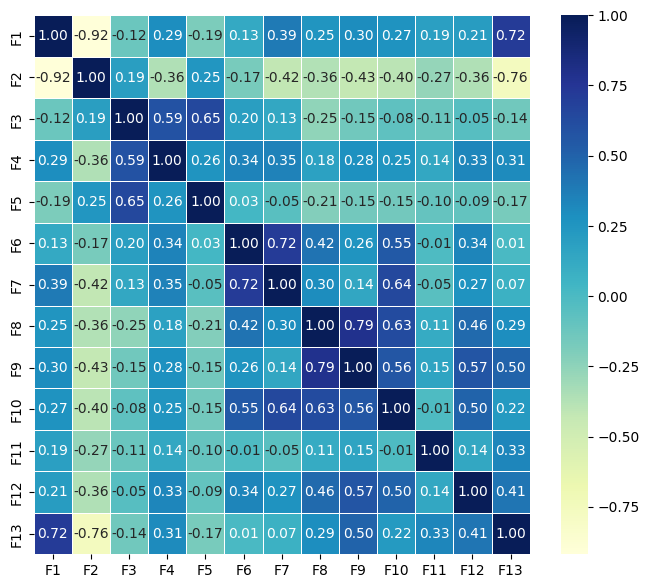

In [51]:
corr_matrix = all_data.corr()
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(corr_matrix,
 annot=True,
 linewidths=0.5,
 fmt=".2f",
 cmap="YlGnBu");
bottom, top = ax.get_ylim()

In [52]:
all_data = pd.concat([all_data, test_data], axis = 1)

In [53]:
all_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,Heuristic_no.
0,1.5346,-1.2477,-0.23316,0.31218,-0.29103,-1.7734,-0.29911,-1.081,-0.4775,-0.51385,-0.42105,-0.65489,1.4630,0
1,1.5403,-1.2477,-0.23316,0.31218,-0.29103,-1.7734,-0.29911,-1.081,-0.4775,-0.50588,-0.42105,-0.65489,1.4801,1
2,1.5346,-1.2477,-0.23316,0.31218,-0.29103,-1.7734,-0.29911,-1.081,-0.4775,-0.50854,-0.42105,-0.65489,1.4744,0
3,1.5346,-1.2477,-0.23316,0.31218,-0.29103,-1.7734,-0.29911,-1.081,-0.4775,-0.52448,-0.42105,-0.65489,1.4401,0
4,1.5346,-1.2477,-0.23316,0.31218,-0.29103,-1.7734,-0.29911,-1.081,-0.4775,-0.52182,-0.42105,-0.65489,1.4458,0


**Checking for unbalanced classes**

<Axes: xlabel='Heuristic_no.', ylabel='count'>

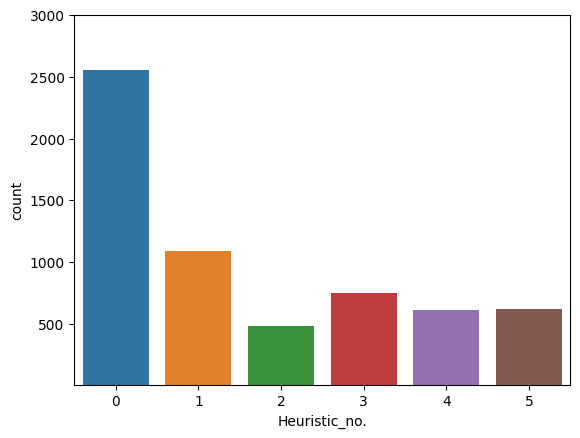

In [54]:
plt.ylim(10, 3000)
sns.countplot(x = all_data['Heuristic_no.'])

Increasing samples of minority classes to create better balance

In [ ]:
#Seperating the 0 heuristic rows
df_filtered = all_data[all_data['Heuristic_no.'] >= 1]
df_heuristic_0  = all_data[all_data['Heuristic_no.'] == 0]

# For upscaling, replicating others
df_filtered_repl = pd.concat([df_filtered]*2) 

# Combining the classes
all_data_balanced = pd.DataFrame()
all_data_balanced = all_data_balanced.append(df_filtered_repl)
all_data_balanced = all_data_balanced.append(df_heuristic_0)
all_data = all_data_balanced

<Axes: xlabel='Heuristic_no.', ylabel='count'>

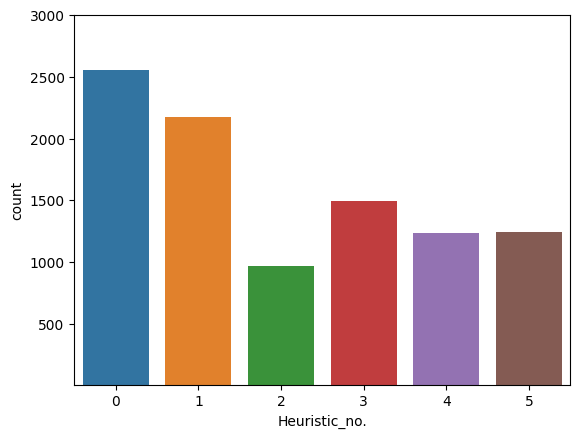

In [56]:
plt.ylim(10, 3000)
sns.countplot(x = all_data['Heuristic_no.'])

# **Modelling**

**Seperating and splitting train & test data**

In [57]:
num_feature = int(num_feature)
train_data = all_data.iloc[:,:num_feature]
test_data = all_data.iloc[:,num_feature]

In [58]:
x_train, x_test, y_train, y_test = train_test_split(train_data, test_data , test_size = 0.1, random_state = 0)

**Applying Classifier models:**

In [59]:
clf1 = Perceptron()
clf2 = LogisticRegression(max_iter = 200)
clf3 = SVC()
clf4 = DecisionTreeClassifier()
clf5 = KNeighborsClassifier()
clf6 = GaussianNB()

**Hyper parameter tuning for XGBClassifier**

In [60]:
parameters = {'n_estimators':[25,50,100,150,200],
              'max_depth':[1,3,5,7,9,None],
              'gamma':[0.5, 1, 2, 5]}

folds = 3
param_comb = 5
XGB = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
skf = StratifiedKFold(n_splits=folds)
grid = RandomizedSearchCV(estimator = XGB, param_distributions=parameters)
grid.fit(x_train, y_train)
print('\n Best hyperparameters:')
print(grid.best_params_)


 Best hyperparameters:
{'n_estimators': 50, 'max_depth': 9, 'gamma': 1}


In [61]:
clf7 = AdaBoostClassifier(n_estimators = 50, learning_rate = 1.0)
clf8 = GradientBoostingClassifier(n_estimators = 50, learning_rate= 0.5, max_depth = None, )
clf9 = RandomForestClassifier(max_depth = 3, n_estimators =50, criterion = 'entropy') 
clf10 = xgb.XGBClassifier(objective="multi:softprob", random_state=42, n_estimators= 50, gamma = 1, max_depth= 9)

**Predicting output and calculating accuracy score**

In [67]:
result = [0,0,0,0,0,0,0,0,0,0]
clf1.fit(x_train, y_train)
pred1 = clf1.predict(x_test)
acc1 = accuracy_score(y_test, pred1)
result[0] = (acc1)

clf2.fit(x_train, y_train)
pred2 = clf2.predict(x_test)
acc2 = accuracy_score(y_test, pred2)
result[1] = (acc2)

clf3.fit(x_train, y_train)
pred3 = clf3.predict(x_test)
acc3 = accuracy_score(y_test, pred3)
result[2] = (acc3)

clf4.fit(x_train, y_train)
pred4 = clf4.predict(x_test)
acc4 = accuracy_score(y_test, pred4)
result[3] = (acc4)

clf5.fit(x_train, y_train)
pred5 = clf5.predict(x_test)
acc5 = accuracy_score(y_test, pred5)
result[4] = (acc5)

clf6.fit(x_train, y_train)
pred6 = clf6.predict(x_test)
acc6 = accuracy_score(y_test, pred6)
result[5] = (acc6)

clf7.fit(x_train, y_train)
pred7 = clf7.predict(x_test)
acc7 = accuracy_score(y_test, pred7)
result[6] = (acc7)

clf8.fit(x_train, y_train)
pred8 = clf8.predict(x_test)
acc8 = accuracy_score(y_test, pred8)
result[7] = (acc8)

clf9.fit(x_train, y_train)
pred9 = clf9.predict(x_test)
acc9 = accuracy_score(y_test, pred9)
result[8] = (acc9)

clf10.fit(x_train, y_train)
pred10 = clf10.predict(x_test)
acc10 = accuracy_score(y_test, pred10)
result[9] = acc10
result = [i*100 for i in result]

# **Results**

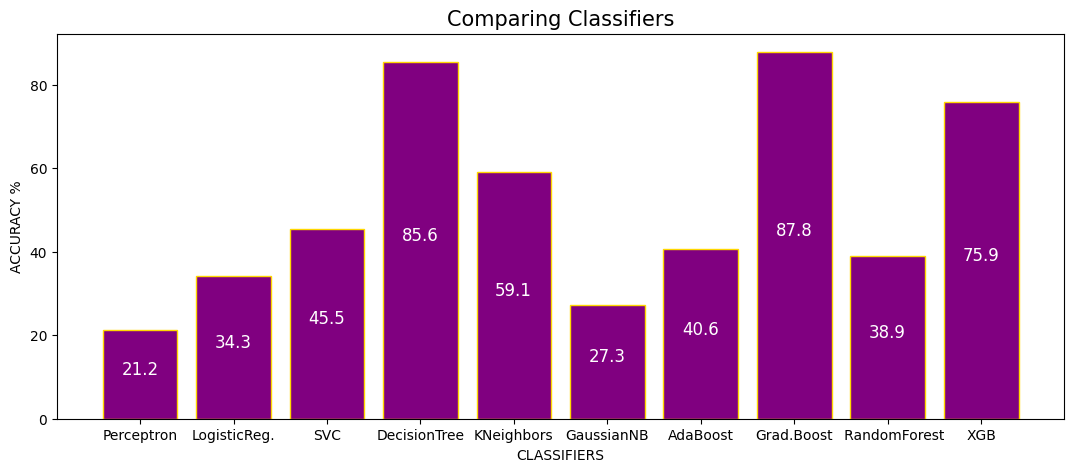

In [123]:
classifier_list = ['Perceptron','LogisticReg.','SVC','DecisionTree',
                   'KNeighbors','GaussianNB','AdaBoost',
                   'Grad.Boost','   RandomForest','XGB']
plt.figure(figsize=(13, 5))
plt.bar(classifier_list, result, color = 'purple', edgecolor = 'gold')
for index, val in enumerate(result):
  plt.text(index-0.2, val/2 , str(round(val, 1)), color = 'white', size = 'large')
plt.xlabel("CLASSIFIERS")
plt.ylabel("ACCURACY %")
plt.title("Comparing Classifiers", fontsize = 15)
plt.show()

## **Classification report of best classifier:**
***GradientBoosting***

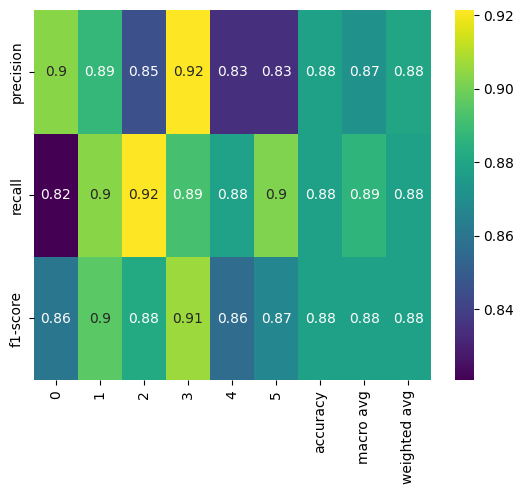

In [121]:
cr = classification_report(y_test, pred8,output_dict=True)
map = sns.heatmap(pd.DataFrame(cr).iloc[:-1, :], annot=True, cmap="viridis")
plt.show()